In [78]:
import pandas as pd

from sklearn import metrics

In [3]:
# load dataset
pima = pd.read_csv("diabetes.csv")

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.columns = col_names

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['bmi','pregnant', 'insulin', 'age','glucose','bp','pedigree']

In [39]:
X1 = pima[feature_cols] # Features
y1 = pima.label # Target variable

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X1,y1,test_size=0.3,random_state=1) 

In [66]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = "entropy",max_depth=4).fit(X_train, y_train)
ypred = model1.predict(xtest)


In [68]:
from sklearn import metrics
metrics.balanced_accuracy_score(ytest,ypred)

0.7452054794520548

In [80]:
metrics.accuracy_score(ytest,ypred)

0.7835497835497836

In [69]:
metrics.confusion_matrix(ytest,ypred)

array([[130,  16],
       [ 34,  51]], dtype=int64)

# Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. 

# Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
#import graphviz

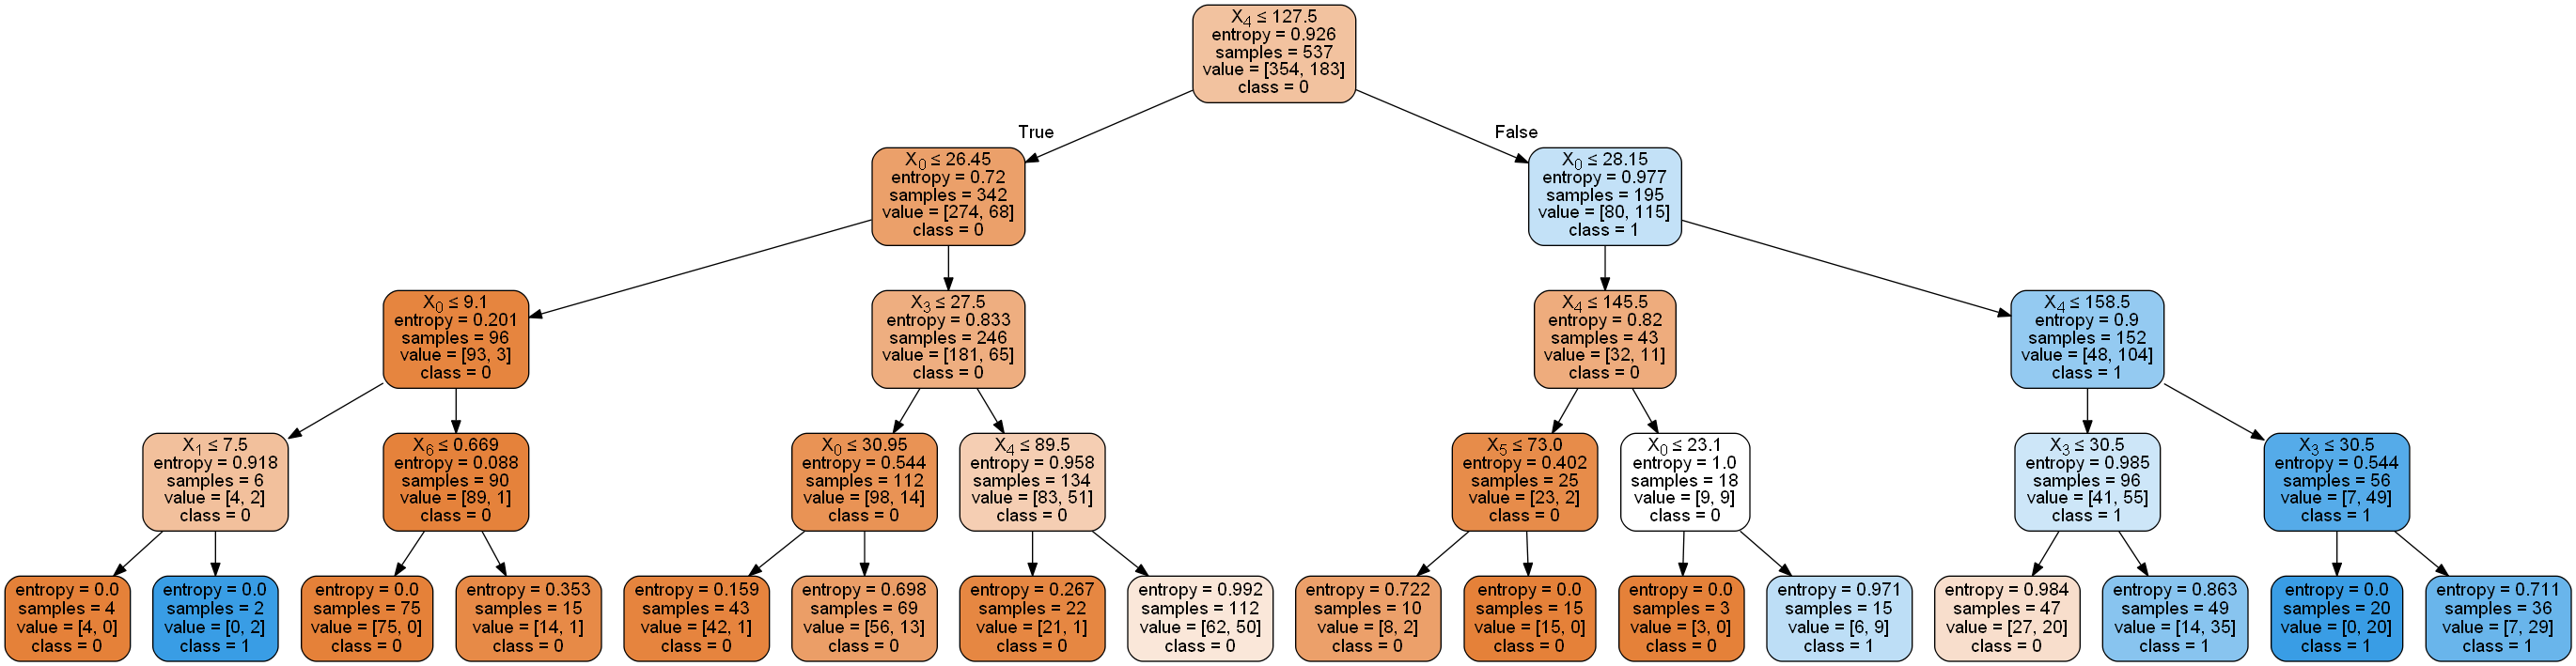

In [35]:
dot_data = StringIO()

export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('diabetes.png')
Image(graph.create_png())

In [70]:
model1.feature_importances_

array([0.28278136, 0.01868673, 0.        , 0.14390586, 0.52492237,
       0.01542043, 0.01428323])

In [77]:
pd.DataFrame({"variables":feature_cols,"importance":model1.feature_importances_}).sort_values(by="importance", ascending=False)

,variables,importance
4,glucose,0.524922
0,bmi,0.282781
3,age,0.143906
1,pregnant,0.018687
5,bp,0.015420
6,pedigree,0.014283
2,insulin,0.000000


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model2 = RandomForestClassifier().fit(xtrain,ytrain)

In [83]:
ypred = model2.predict(xtest)

In [84]:
metrics.accuracy_score(ytest,ypred)

0.7922077922077922

In [86]:
pd.DataFrame({"variables":feature_cols,"importance":model2.feature_importances_}).sort_values(by="importance", ascending=False)

,variables,importance
4,glucose,0.253445
0,bmi,0.195020
6,pedigree,0.138731
3,age,0.138120
5,bp,0.097540
1,pregnant,0.093732
2,insulin,0.083411


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier